# Statistique en Grande Dimension et Apprentissage - TP 4 SVM

Les SVM à noyaux sont implémentées dans "scikit-learn" dans les classes "sklearn.svm.SVC" pour la classification et "sklearn.svm.SVR" pour la régression. Dans ces deux classes, on peut spécifier un noyau grâce au paramètre «kernel». Ce noyau peut être (linéaire, polynomial, RBF), mais on peut aussi définir vos propres noyaux !

## Exercice 1 (Exemples simulés)

## Exemple 1

### 1. 

In [1]:
def Echantillon(n):
    
    x = np.random.uniform(-3,3,n)
    b = np.random.uniform(-3,3,n)
    Y = np.zeros(n)
    
    Y[b > 0] = [1 for i in range(np.sum(b > 0))]
    Y[b < 0] = [-1 for i in range(np.sum(b < 0))]
    
    return pd.DataFrame({'X1': x,'X2': x+b,'Y': Y.astype(int)})

In [2]:
from random import *
import numpy as np
import pandas as pd

pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)

n = 200

df = Echantillon(n)
df.head(10)

,X1,X2,Y
0,1.726849,2.413361,1
1,-2.345408,-1.918557,1
2,1.261321,3.480973,1
3,-2.017501,0.562436,1
4,0.238156,-2.724187,-1
5,-2.172031,0.754500,1
6,-1.156171,-0.099148,1
7,1.225533,0.704981,-1
8,1.561802,-0.647939,-1
9,2.254347,1.076375,-1


In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="darkgrid")
plt.figure(figsize=(8,8))

#plt.plot([-3, 3], [-3, 3], sns.xkcd_rgb["denim blue"], lw=3);

sn = sns.scatterplot(x="X1", y="X2", hue="Y", palette=["C0", "C1"], data=df, s =50)
sn

In [4]:
sum(df["Y"]==0)

0

### 2.

In [5]:
from sklearn.svm import SVC

svmlinear = SVC(C=100,kernel='linear')
svmlinear.fit(df[["X1","X2"]], df["Y"])

SVC(C=100, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='linear', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

### 3.

### 4.

In [6]:
xi = svmlinear.support_vectors_ # coordonnées des vecteur supports
print("nombre de vecteurs supports: ", xi.shape[0],"\n")
print(xi)

nombre de vecteurs supports:  7 

[[-1.56084638 -1.5696999 ]
 [ 0.19003688  0.01971934]
 [-1.46583097 -1.53735297]
 [-1.4380186  -1.58530833]
 [-1.28262178 -1.26725788]
 [-0.32865556 -0.32426606]
 [-1.90920904 -1.90694659]]


In [7]:
print(svmlinear.support_) # indice des vecteur supports

[ 20 127 129 169  55 111 190]


In [8]:
#coefficients beta1 et beta2
print(svmlinear.coef_)

[[-11.77883291  11.94782972]]


In [9]:
beta0 = svmlinear.intercept_[0] # l'intercept beta0
print(beta0)

1.0029067763813508


### 5.


### 6. 

In [10]:
from sklearn.metrics import confusion_matrix

prediction=svmlinear.predict(df[["X1","X2"]])

print("matrice de confusion")
M1 = confusion_matrix(df["Y"], prediction)
M1

matrice de confusion


array([[104,   1],
       [  0,  95]])

In [11]:
print("Précision de classification d'entraînement:", M1.trace()/M1.sum())

Précision de classification d'entraînement: 0.995


### 7.

In [12]:
df_test = Echantillon(100)

prediction_test = svmlinear.predict(df_test[["X1","X2"]])

print("matrice de confusion")
M_test = confusion_matrix(df_test["Y"], prediction_test)
M_test

matrice de confusion


array([[50,  1],
       [ 0, 49]])

In [13]:
print("Précision de classification de test:", M_test.trace()/M_test.sum())

Précision de classification de test: 0.99


### 8.

In [14]:
svm_defaut = SVC()
svm_defaut # le noyau par default sur sklearn est 'rbf'
# RBF :  Radial Basis Function, désigne souvent le noyau gaussien.

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='rbf', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

In [15]:
svm_defaut.fit(df[["X1","X2"]], df["Y"])
prediction_defaut=svm_defaut.predict(df_test[["X1","X2"]])

/app/anaconda/3-2019-07/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


In [16]:
print("matrice de confusion:")
M_defaut = confusion_matrix(df_test["Y"], prediction_defaut)
print(M_defaut)

matrice de confusion:
[[50  1]
 [ 1 48]]


In [17]:
print("Précision de classification de test:", M_defaut.trace()/M_defaut.sum())

Précision de classification de test: 0.98


## Exemple 2

### 1. & 2.

In [18]:
from random import *
import numpy as np
import pandas as pd


def Echantillon(n,p):
    X = np.random.randn(n*p)
    X = X.reshape(n,p)
    Y = np.ones(n)

    df = pd.DataFrame({'X1': X[:,0],'X2': X[:,1],'Y': Y})

    Norme = df[['X1','X2']].apply(lambda x: sum(x**2), axis=1)
    Y[Norme > p] = -1

    df['Y'] = Y
    df['Y'] = df['Y'].astype(int)

    print(df.dtypes)
    
    return df

In [19]:
n = 100
p = 2

df = Echantillon(n,p)

X1    float64
X2    float64
Y       int64
dtype: object


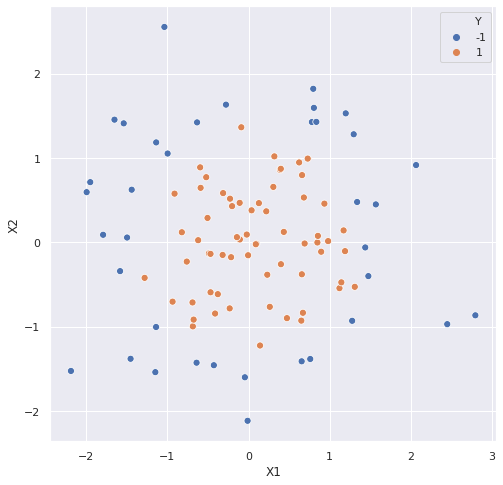

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="darkgrid")
plt.figure(figsize=(8,8))

sn = sns.scatterplot(x="X1", y="X2", hue="Y", palette=["C0", "C1"], data=df, s =50)
sn

### 3.

##### a.

In [21]:
from sklearn.svm import SVC

svmPoly = SVC(C=10,degree=3, gamma='auto',coef0=0.0, kernel='poly')
svmPoly.fit(df[["X1","X2"]], df["Y"])

svmRBF = SVC(C=10, gamma='auto', kernel='rbf')
svmRBF.fit(df[["X1","X2"]], df["Y"])

SVC(C=10, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

##### b.

In [22]:
n = 100
p = 2
df_test = Echantillon(n,p)

X1    float64
X2    float64
Y       int64
dtype: object


#### SVM Rbf

In [23]:
from sklearn.model_selection import GridSearchCV

#on crée un nouveau modèle SVM à noyau Gaussien
svmRBF = SVC(kernel='rbf')

#on crée un dictionnaire de toutes les valeurs que nous voulons tester
param_grid_RBF = {"C": np.arange(0.1, 20), "gamma" : np.arange(0,1,0.05)}

#on utilise gridsearch pour tester toutes les valeurs de param_grid
svmRBF_gscv = GridSearchCV(svmRBF, param_grid_RBF, cv=5, n_jobs=-1, verbose=10)

#ajustement du modèle aux données
svmRBF_gscv.fit(df[["X1","X2"]], df["Y"])

print("Précision Train: ",svmRBF_gscv.score(df[["X1","X2"]], df["Y"]))
print("Précision Test: ",svmRBF_gscv.score(df_test[["X1","X2"]], df_test["Y"]))
print("\n")
print(svmRBF_gscv.best_params_)

Fitting 5 folds for each of 400 candidates, totalling 2000 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 32 concurrent workers.
[Parallel(n_jobs=-1)]: Done   8 tasks      | elapsed:    6.4s
[Parallel(n_jobs=-1)]: Done  21 tasks      | elapsed:    6.4s
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    6.4s
[Parallel(n_jobs=-1)]: Done  49 tasks      | elapsed:    6.6s
[Parallel(n_jobs=-1)]: Done  64 tasks      | elapsed:    6.7s
[Parallel(n_jobs=-1)]: Done  81 tasks      | elapsed:    6.8s
[Parallel(n_jobs=-1)]: Done  98 tasks      | elapsed:    6.9s
[Parallel(n_jobs=-1)]: Done 117 tasks      | elapsed:    6.9s
[Parallel(n_jobs=-1)]: Done 136 tasks      | elapsed:    7.0s
[Parallel(n_jobs=-1)]: Done 157 tasks      | elapsed:    7.1s
[Parallel(n_jobs=-1)]: Done 178 tasks      | elapsed:    7.2s
[Parallel(n_jobs=-1)]: Done 201 tasks      | elapsed:    7.3s
[Parallel(n_jobs=-1)]: Done 224 tasks      | elapsed:    7.4s
[Parallel(n_jobs=-1)]: Done 249 tasks      | elapsed:    7.5s
[Parallel(n_jobs=-1)]: Done 274 tasks      | elapsed:  

Précision Train:  0.99
Précision Test:  0.95


{'C': 7.1, 'gamma': 0.30000000000000004}


[Parallel(n_jobs=-1)]: Done 1921 tasks      | elapsed:   15.0s
[Parallel(n_jobs=-1)]: Done 2000 out of 2000 | elapsed:   15.1s finished
/app/anaconda/3-2019-07/lib/python3.7/site-packages/sklearn/model_selection/_search.py:813: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


In [ ]:
#les paramétres du modéle le plus performant:
svmRBF_gscv.best_params_

In [ ]:
from sklearn.metrics import confusion_matrix

prediction_test_RBF = svmRBF_gscv.predict(df_test[["X1","X2"]])

print("matrice de confusion")
M_smvRBF = confusion_matrix(df_test["Y"], prediction_test_RBF)
M_smvRBF

In [ ]:
print("Précision de classification de test:", M_smvRBF.trace()/M_smvRBF.sum())

##### c.

In [ ]:
#on crée un nouveau modèle SVM à noyau Polynomiale
svmPOLY = SVC(kernel='poly')

#on crée un dictionnaire de toutes les valeurs que nous voulons tester
param_grid_POLY = {"C": np.arange(0.1, 20), "gamma" : np.arange(0,1,0.05), "degree": [2,3], "coef0": np.arange(0,1,0.5)}

#on utilise gridsearch pour tester toutes les valeurs
svmPOLY_gscv = GridSearchCV(svmPOLY, param_grid_POLY, cv=5, n_jobs=-1, verbose=10)

#ajustement du modèle aux données
svmPOLY_gscv.fit(df[["X1","X2"]], df["Y"])

print("Précision Train: ",svmPOLY_gscv.score(df[["X1","X2"]], df["Y"]))
print("Précision Test: ",svmPOLY_gscv.score(df_test[["X1","X2"]], df_test["Y"]))
print("\n")
print(svmPOLY_gscv.best_params_)

In [ ]:
#les paramétres du modéle le plus performant:
svmPOLY_gscv.best_params_

In [ ]:
prediction_test_POLY = svmPOLY_gscv.predict(df_test[["X1","X2"]])

print("matrice de confusion")
M_smvPOLY = confusion_matrix(df_test["Y"], prediction_test_POLY)
M_smvPOLY

In [ ]:
print("Précision de classification de test:", M_smvPOLY.trace()/M_smvPOLY.sum())

##### Avec un SVM linéaire ?

In [ ]:
#on crée un nouveau modèle SVM à noyau Polynomiale
svmLINEAR = SVC(kernel='linear')

#on crée un dictionnaire de toutes les valeurs que nous voulons tester
param_grid_LINEAR = {"C": np.arange(0.1, 100)}

#on utilise gridsearch pour tester toutes les valeurs
svmLINEAR_gscv = GridSearchCV(svmLINEAR, param_grid_LINEAR, cv=5, n_jobs=-1, verbose=10)

#ajustement du modèle aux données
svmLINEAR_gscv.fit(df[["X1","X2"]], df["Y"])

print("Précision Train: ",svmLINEAR_gscv.score(df[["X1","X2"]], df["Y"]))
print("Précision Test: ",svmLINEAR_gscv.score(df_test[["X1","X2"]], df_test["Y"]))
print("\n")
print(svmLINEAR_gscv.best_params_)

In [ ]:
#les paramétres du modéle le plus performant:
svmLINEAR_gscv.best_params_

In [ ]:
prediction_test_LINEAR = svmLINEAR_gscv.predict(df_test[["X1","X2"]])

# construire la courbe ROC
from sklearn import metrics
fpr, tpr, thr = metrics.roc_curve(df_test["Y"], prediction_test_LINEAR)

# calculer l'aire sous la courbe ROC
auc = metrics.auc(fpr, tpr)

# créer une figure
from matplotlib import pyplot as plt
fig = plt.figure(figsize=(8, 8))

# afficher la courbe ROC
plt.plot(fpr, tpr, '-', lw=2, label='AUC=%.2f' % auc)

# donner un titre aux axes et au graphique
plt.xlabel('False Positive Rate', fontsize=16)
plt.ylabel('True Positive Rate', fontsize=16)
plt.title('SVM Courbe ROC', fontsize=16)

# afficher la légende
plt.legend(loc="lower right", fontsize=14)

# afficher l'image
plt.show()

In [ ]:
print("matrice de confusion")
M_smvLINEAR = confusion_matrix(df_test["Y"], prediction_test_LINEAR)
M_smvLINEAR

In [ ]:
print("Précision de classification de test:", M_smvLINEAR.trace()/M_smvLINEAR.sum())

In [ ]:
# On récupére le meilleur modéle de 'gscv
svmLINEAR = svmLINEAR_gscv.best_estimator_ 

In [ ]:
print(svmLINEAR.support_) # indice des vecteur supports

In [ ]:
print("Nombre de vecteurs supports: ",svmLINEAR.support_.shape[0])

In [ ]:
# l'intercept beta0
beta0 = svmLINEAR.intercept_[0]
print("beta0: ", round(beta0,3))

#coefficients beta1 et beta2
beta = svmLINEAR.coef_
print("beta1: ",round(beta[0][0],3))
print("beta2: ",round(beta[0][1],3))

In [ ]:
a = -beta[0][1]/beta[0][0]
b = -beta0/beta[0][0]

print("a: ",round(a,3))
print("b: ",round(b,3))

In [ ]:
sns.set(style="darkgrid")
plt.figure(figsize=(8,8))
plt.plot([-2.5, 2.5], [-2.5*a+b, 2.5*a+b], sns.xkcd_rgb["pale red"], lw=3);
sn = sns.scatterplot(x="X1", y="X2", hue="Y", palette=["C0", "C1"], data=df_test, s =50)
sn

### N.B. Un principe usuel pour améliorer les résultats consiste à agréger les modèles, i.e. à faire une combinaison linéaire de plusieurs modèles. Ce principe pourrait être employé ici (voir Adaboost).

In [ ]:
from sklearn.ensemble import AdaBoostClassifier

clf = AdaBoostClassifier(SVC(probability=True, kernel='linear'),n_estimators=50, learning_rate=1.0, algorithm='SAMME')
clf.fit(df[["X1","X2"]], df["Y"])

In [ ]:
print("Précision Train: ",clf.score(df[["X1","X2"]], df["Y"]))
print("Précision Test: ",clf.score(df_test[["X1","X2"]], df_test["Y"]))

### On peut combiner tous les modéles et faire un vote mojoritaire pondéré:

In [ ]:
from sklearn.ensemble import VotingClassifier

Estimateurs = [('poly', svmPOLY_gscv.best_estimator_),
               ('rbf', svmRBF_gscv.best_estimator_),
               ('linear', svmLINEAR_gscv.best_estimator_)]

SVM = VotingClassifier(estimators=Estimateurs, voting='hard',n_jobs=-1)

In [ ]:
SVM.fit(df[["X1","X2"]], df["Y"])

In [ ]:
print("Précision Train: ",SVM.score(df[["X1","X2"]], df["Y"]))
print("Précision Test: ",SVM.score(df_test[["X1","X2"]], df_test["Y"]))

### 4. 

In [ ]:
n = 100
p = 10

df = Echantillon(n,p)
df_test = Echantillon(n,p)

## Exercice 2

### 1. Traitement des données

In [ ]:
from sklearn import datasets

# import some data to play with
iris = datasets.load_iris()
X = iris.data
y = iris.target
Names = iris.target_names

In [ ]:
iris = pd.DataFrame({'Sepal.Length' :X[:,0],
                     'Sepal.Width'  :X[:,1],
                     'Petal.Length' :X[:,2],
                     'Petal.Width'  :X[:,3],
                     'Species'      :y})
iris.head()

In [ ]:
sns.set(style="darkgrid")
plt.figure(figsize=(8,8))
print(Names)
col = iris.columns
sn = sns.scatterplot(x=col[2], y=col[3], hue=col[4], palette="viridis", data=iris, s =50)
sn

In [ ]:
col

In [ ]:
from sklearn.model_selection import train_test_split

# on crée les données d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

print (X_train.shape, y_train.shape)
print (X_test.shape, y_test.shape)

### 2. Modéles SVM

### a. SVM Linear 

In [ ]:
#on crée un nouveau modèle SVM à noyau Polynomiale
svmLINEAR = SVC(kernel='linear',probability=True)

#on crée un dictionnaire de toutes les valeurs que nous voulons tester
param_grid_LINEAR = {"C": np.arange(0.1, 100)}

#on utilise gridsearch pour tester toutes les valeurs
svmLINEAR_gscv = GridSearchCV(svmLINEAR, param_grid_LINEAR, cv=5, n_jobs=-1, verbose=10)

#ajustement du modèle aux données
svmLINEAR_gscv.fit(X_train, y_train)

print("Précision Train: ",round(svmLINEAR_gscv.score(X_train, y_train),3))
print("Précision Test: ",round(svmLINEAR_gscv.score(X_test, y_test),3))
print("\n")
print(svmLINEAR_gscv.best_params_)

### b. SVM Poly

In [ ]:
#on crée un nouveau modèle SVM à noyau Polynomiale
svmPOLY = SVC(kernel='poly',probability=True)

#on crée un dictionnaire de toutes les valeurs que nous voulons tester
param_grid_POLY = {"C": np.arange(0.1, 20), "gamma" : np.arange(0,1,0.05), "degree": [2,3,4], "coef0": np.arange(0,1,0.5)}

#on utilise gridsearch pour tester toutes les valeurs
svmPOLY_gscv = GridSearchCV(svmPOLY, param_grid_POLY, cv=5, n_jobs=-1, verbose=10)

#ajustement du modèle aux données
svmPOLY_gscv.fit(X_train, y_train)

print("Précision Train: ",round(svmPOLY_gscv.score(X_train, y_train),3))
print("Précision Test: ",round(svmPOLY_gscv.score(X_test, y_test),3))
print("\n")
print(svmPOLY_gscv.best_params_)

### c. SMV Rbf

In [ ]:
from sklearn.model_selection import GridSearchCV

#on crée un nouveau modèle SVM à noyau Gaussien
svmRBF = SVC(kernel='rbf',probability=True)

#on crée un dictionnaire de toutes les valeurs que nous voulons tester
param_grid_RBF = {"C": np.arange(0.1, 20), "gamma" : np.arange(0,1,0.05)}

#on utilise gridsearch pour tester toutes les valeurs de param_grid
svmRBF_gscv = GridSearchCV(svmRBF, param_grid_RBF, cv=5, n_jobs=-1, verbose=10)

#ajustement du modèle aux données
svmRBF_gscv.fit(X_train,y_train)

print("Précision Train: ",round(svmRBF_gscv.score(X_train,y_train),3))
print("Précision Test: ",round(svmRBF_gscv.score(X_test,y_test),3))
print("\n")


### conclusion:

In [ ]:
from sklearn.ensemble import VotingClassifier

Estimateurs = [('poly', svmPOLY_gscv.best_estimator_),
               ('rbf', svmRBF_gscv.best_estimator_),
               ('linear', svmLINEAR_gscv.best_estimator_)]

poids = [1,2,2]

SVM = VotingClassifier(estimators=Estimateurs, 
                       voting='soft',
                       weights=poids,
                       n_jobs=-1)

In [ ]:
SVM.fit(X_train, y_train)

In [ ]:
print("Précision Train: ",round(SVM.score(X_train, y_train),3))
print("Précision Test: ",round(SVM.score(X_test, y_test),3))

## Exercice 3

In [25]:
path_Home = "/home/malick/Bureau/Data/Statistique_en_grande_dimension"
path = "/users/mmath/wade/Bureau/Data/Statistique_en_grande_dimension"

df = pd.read_csv(path + "/ozone.dat",  sep=' ')
df.head(100)

,JOUR,O3obs,MOCAGE,TEMPE,RMH2O,NO2,NO,STATION,VentMOD,VentANG
0,1,91,93.2,21.5,0.00847,1.602,0.424,Aix,9.5000,-0.64350
1,1,100,104.6,20.2,0.00881,2.121,0.531,Aix,8.0100,-0.04996
2,0,82,103.6,17.4,0.00951,1.657,0.467,Aix,9.3771,-0.12832
3,0,94,94.8,18.8,0.00855,2.350,0.701,Aix,9.4578,-0.34516
4,0,107,99.0,23.7,0.00731,1.653,0.452,Aix,7.8791,-0.41822
5,0,150,114.3,23.6,0.01182,5.316,1.343,Aix,6.3127,0.06341
6,0,164,127.7,26.6,0.00937,2.841,0.550,Aix,4.8042,0.04164
7,1,135,164.3,23.5,0.01087,15.733,2.911,Aix,4.8795,0.79989
8,1,121,144.1,23.3,0.01168,8.807,1.867,Aix,5.1088,0.70226
9,0,129,112.8,23.7,0.01091,18.911,4.700,Aix,5.4406,0.94200


## Exercice 4

### 1. Traitement des données

In [ ]:
path_Home = "/home/malick/Bureau/Data/Statistique_en_grande_dimension/Donnees_knn"
path = "/users/mmath/wade/Bureau/Data/Statistique_en_grande_dimension/Donnees_knn"

df_train = pd.read_csv(path + "/mnist_train.csv",  sep=',')
df_test = pd.read_csv(path + "/mnist_test.csv",  sep=',')

In [ ]:
# On sépare la variable cible des variables explicatives
Xtrain = df_train.iloc[:,1:df_train.shape[1]]
Ytrain = df_train.iloc[:,0:1]

Xtest = df_test.iloc[:,1:df_train.shape[1]]
Ytest = df_test.iloc[:,0:1]

In [ ]:
# 500 individus pour l'entrainement
Xtrain_1000 = Xtrain.sample(n=500, random_state=1, replace=False)
X_train = Xtrain_1000.reset_index(drop=True)

Ytrain_1000 = Ytrain.sample(n=500, random_state=1, replace=False)
y_train = Ytrain_1000.reset_index(drop=True)

# 500 individus pour le test
Xtest_500 = Xtest.sample(n=500, random_state=2, replace=False)
X_test = Xtest_500.reset_index(drop=True)

Ytest_500 = Ytest.sample(n=500, random_state=2, replace=False)
y_test = Ytest_500.reset_index(drop=True)

### 2. Modéles SVM

### a. SVM Linear 

In [ ]:
import time

#on crée un nouveau modèle SVM à noyau Polynomiale
svmLINEAR = SVC(kernel='linear')

#on crée un dictionnaire de toutes les valeurs que nous voulons tester
param_grid_LINEAR = {"C": np.arange(0.1, 100)}

#on utilise gridsearch pour tester toutes les valeurs
svmLINEAR_gscv = GridSearchCV(svmLINEAR, param_grid_LINEAR, cv=5, n_jobs=-1, verbose=10)

#ajustement du modèle aux données
t_debut = time.time()
svmLINEAR_gscv.fit(X_train, y_train)
t_fin = time.time()

temps_SVM_Linear = (t_fin - t_debut)/60

print("Précision Train: ",round(svmLINEAR_gscv.score(X_train, y_train),3))
print("Précision Test: ",round(svmLINEAR_gscv.score(X_test, y_test),3))
print("\n")
print(svmLINEAR_gscv.best_params_)

### b. SVM Poly

In [ ]:
#on crée un nouveau modèle SVM à noyau Polynomiale
svmPOLY = SVC(kernel='poly')

#on crée un dictionnaire de toutes les valeurs que nous voulons tester
param_grid_POLY = {"C": np.arange(0.1, 20), "gamma" : np.arange(0,1,0.05), "degree": [2,3,4], "coef0": np.arange(0,1,0.5)}

#on utilise gridsearch pour tester toutes les valeurs
svmPOLY_gscv = GridSearchCV(svmPOLY, param_grid_POLY, cv=5, n_jobs=-1, verbose=10)

#ajustement du modèle aux données
t_debut = time.time()
svmPOLY_gscv.fit(X_train, y_train)
t_fin = time.time()

temps_SVM_Poly = (t_fin - t_debut)/60

print("Précision Train: ",round(svmPOLY_gscv.score(X_train, y_train),3))
print("Précision Test: ",round(svmPOLY_gscv.score(X_test, y_test),3))
print("\n")
print(svmPOLY_gscv.best_params_)

### c. SMV Rbf

In [ ]:
from sklearn.model_selection import GridSearchCV

#on crée un nouveau modèle SVM à noyau Gaussien
svmRBF = SVC(kernel='rbf')

#on crée un dictionnaire de toutes les valeurs que nous voulons tester
param_grid_RBF = {"C": np.arange(0.1, 20), "gamma" : np.arange(0,1,0.05)}

#on utilise gridsearch pour tester toutes les valeurs de param_grid
svmRBF_gscv = GridSearchCV(svmRBF, param_grid_RBF, cv=5, n_jobs=-1, verbose=10)

#ajustement du modèle aux données
t_debut = time.time()
svmRBF_gscv.fit(X_train,y_train)
t_fin = time.time()

temps_SVM_Rbf = (t_fin - t_debut)/60

print("Précision Train: ",round(svmRBF_gscv.score(X_train,y_train),3))
print("Précision Test: ",round(svmRBF_gscv.score(X_test,y_test),3))
print("\n")

print(svmRBF_gscv.best_params_)

In [ ]:
Precision_MNIST = pd.DataFrame({'SVM_Linear' :[round(svmLINEAR_gscv.score(X_test, y_test),3),temps_SVM_Linear],
                               'SVM_Poly' :[round(svmPOLY_gscv.score(X_test, y_test),3),temps_SVM_Poly],
                               'SVM_Rbf' :[round(svmRBF_gscv.score(X_test,y_test),3),temps_SVM_Rbf]},
                                index = ['Précision', "temps d'entrainement"])
Precision_MNIST.head()